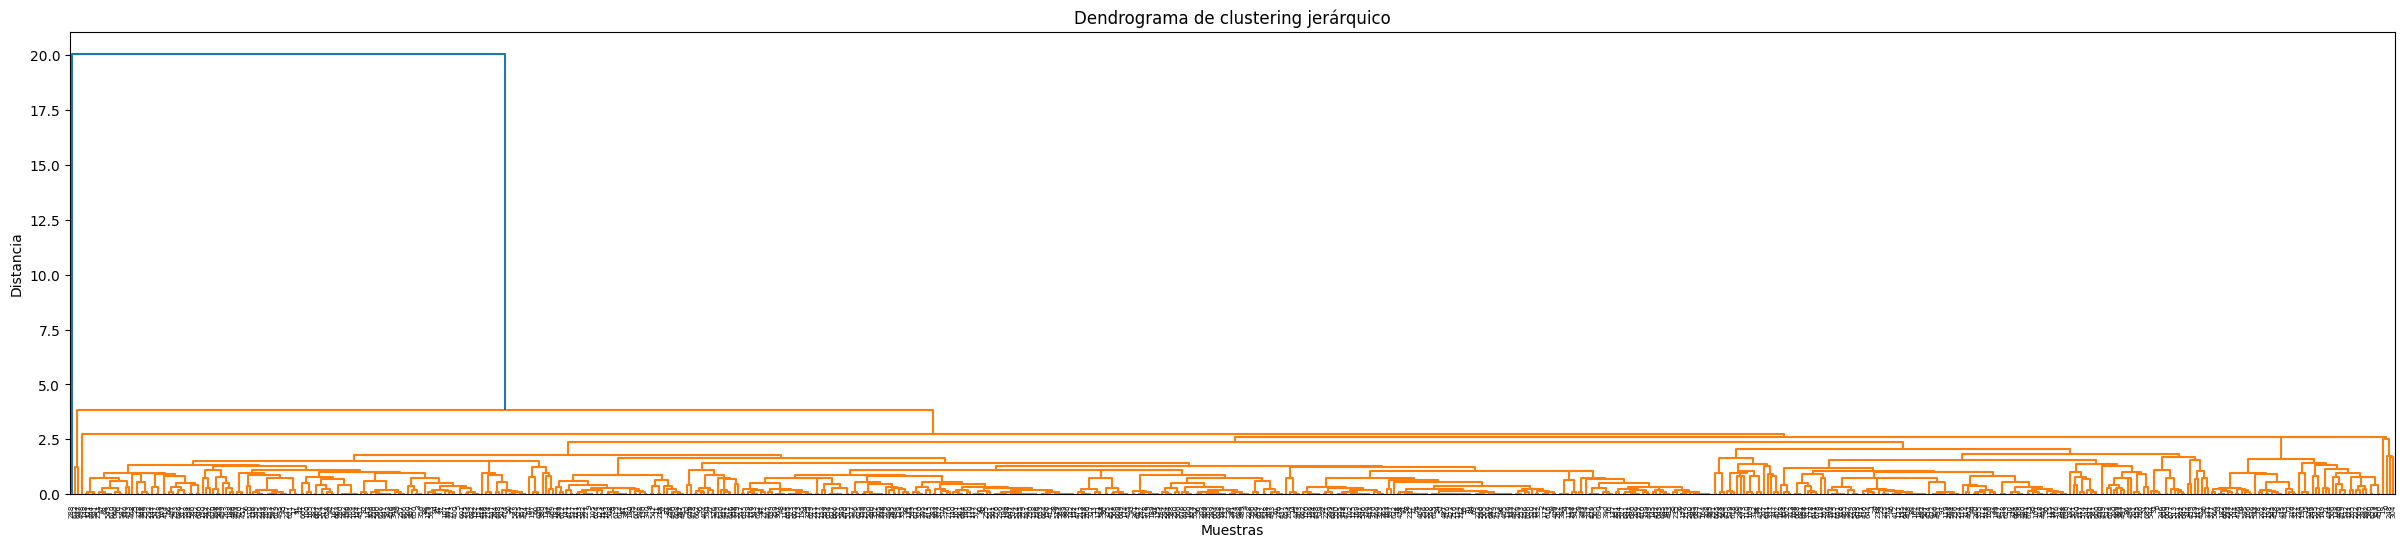

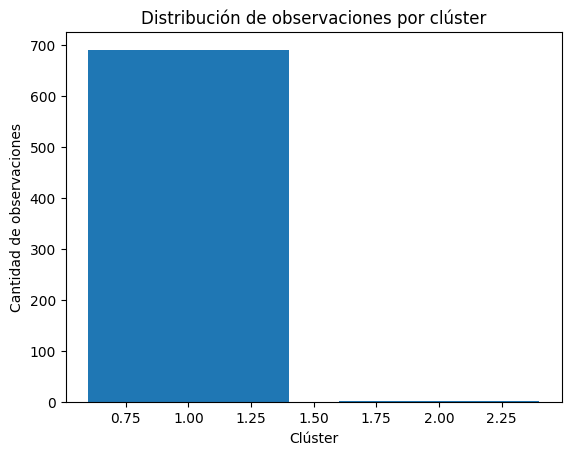

In [10]:
#importamos paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler, StandardScaler

path = "C:/Users/Martin/OneDrive/Documentos/U.T.N/4to ISI/Minería de Datos/TP Integrador/data";
df = pd.read_csv(path + "/predicciones (si-si).csv", sep=';',encoding='utf8')
df.head()
df = df[["IngresoAnual","TotalHijos","CantAutomoviles","Edad"]]
df.describe()

# Estandarizar la matriz de enlace Z utilizando StandardScaler
scaler = StandardScaler() #MinMaxScaler() 
df_Z = scaler.fit_transform(df)


df_Z = pd.DataFrame(df_Z, columns=["IngresoAnual","TotalHijos","CantAutomoviles","Edad"])

# Realizar clustering jerárquico utilizando enlace completo (complete linkage)
Z = linkage(df_Z,'centroid') 

# Crear un dendrograma
plt.figure(figsize=(30, 6))
dendrogram(Z)
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# Asigna los clústeres a las muestras
num_clusteres = 2
asignaciones = fcluster(Z, num_clusteres, criterion='maxclust')


# Agrega la variable "Cluster"
df['Cluster'] = asignaciones

# Observaciones por cluster
cluster_counts = df['Cluster'].value_counts()

# Gráfica de barras de observaciones por cluster
plt.bar(cluster_counts.index, df['Cluster'].value_counts())
plt.xlabel('Clúster')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de observaciones por clúster')
plt.show()